# CNN的影像分類應用

- ref: https://www.twblogs.net/a/5e4f584abd9eee101e851e85

In [ ]:
# !pip install scipy

In [1]:
import os, shutil
# The path to the directory where the original
# dataset was uncompressed（原始數據集解壓目錄的路徑）
original_dataset_dir = 'data/kaggle_original_data'

# The directory where we will
# store our smaller dataset（保存較小數據集的目錄）
base_dir = 'data/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test splits
#（分別對應劃分後的訓練、 驗證和測試的目錄）
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
# Directory with our training cat pictures(貓的訓練圖像目錄)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures(狗的訓練圖像目錄)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    # Directory with our validation cat pictures(貓的驗證圖像目錄)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures(狗的驗證圖像目錄)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    # Directory with our test cat pictures（貓的測試圖像目錄）
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our test dog pictures（狗的測試圖像目錄）
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


- 25,000 images of dogs and cats

In [2]:
# Copy first 1000 cat images to train_cats_dir（將前 1000 張貓的圖像複製 到 train_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to validation_cats_dir（將 接 下 來 500 張 貓 的 圖像 復 制到 validation_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir（將 接 下 來的 500 張 貓 的 圖像 複製到 test_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir（將前 1000 張狗的圖像複製 到 train_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir（將接下來 500 張狗的圖像復 制到 validation_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir（將接下來 500 張狗的圖像複製到 test_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    


- check our train / test data number

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### 數據增強
- rotation_range :（0~180）隨機旋轉的角度範圍
- width_shift 和 height_shift: 水平或垂直方向上平移的範圍
- shear_range 是隨機錯切變換的角度
- zoom_range 是圖像隨機縮放的範圍
- horizontal_flip 是隨機將一半圖像水平翻轉
- fill_mode是用於填充新創建像素的方法

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

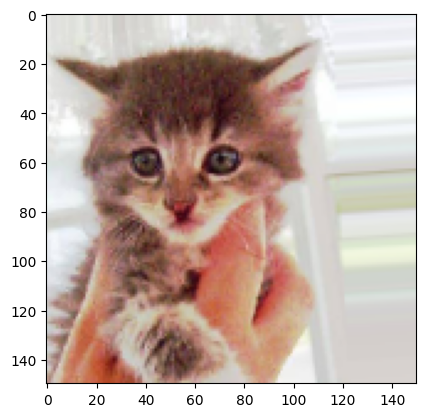

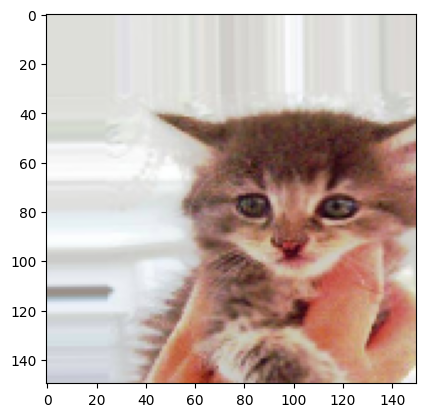

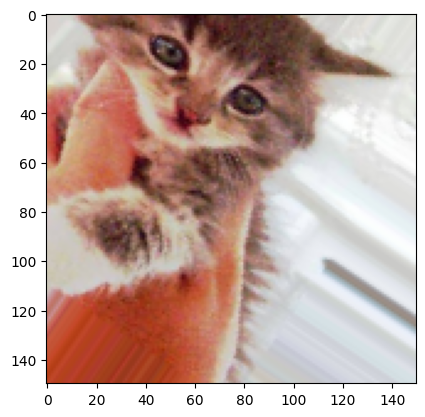

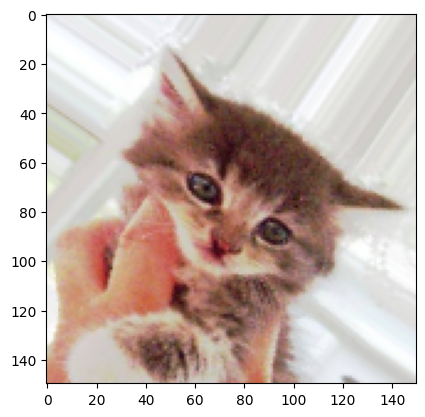

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"（選擇一張圖像進行增強）
img_path = fnames[3]

# Read the image and resize it（讀取圖像並調整大小）
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)（將其轉換爲形狀 (150, 150, 3) 的 Numpy 數組）
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)（將其形狀改變爲 (1, 150, 150, 3)）
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
#生成隨機變換後的圖像批量。 循環是無限的，因此你需要在某個時刻終止循環

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!（注意，不能增強驗證數據）
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory（目標目錄）
        train_dir,
        # All images will be resized to 150x150（將所有圖像的大小調整爲 150×150）
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        #（因爲使用了 binary_crossentropy損失，所以需要用二進制標籤）
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 50s 497ms/step - loss: 0.6936 - acc: 0.5210 - val_loss: 0.6877 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 53s 525ms/step - loss: 0.6853 - acc: 0.5500 - val_loss: 0.6914 - val_acc: 0.5060
Epoch 3/100
100/100 [==============================] - 53s 531ms/step - loss: 0.6771 - acc: 0.5720 - val_loss: 0.6461 - val_acc: 0.6060
Epoch 4/100
100/100 [==============================] - 59s 594ms/step - loss: 0.6626 - acc: 0.5740 - val_loss: 0.6228 - val_acc: 0.6230
Epoch 5/100
100/100 [==============================] - 51s 505ms/step - loss: 0.6366 - acc: 0.6330 - val_loss: 0.6056 - val_acc: 0.6560
Epoch 6/100
100/100 [==============================] - 53s 525ms/step - loss: 0.6220 - acc: 0.6505 - val_loss: 0.5856 - val_acc: 0.6870
Epoch 7/100
100/100 [==============================] - 53s 533ms/step - loss: 0.6096 - acc: 0.6685 - val_loss: 0.5952 - val_acc: 0.6860
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 43s 427ms/step - loss: 0.4276 - acc: 0.8005 - val_loss: 0.6194 - val_acc: 0.7240
Epoch 62/100
100/100 [==============================] - 51s 506ms/step - loss: 0.4384 - acc: 0.7975 - val_loss: 0.4056 - val_acc: 0.8210
Epoch 63/100
100/100 [==============================] - 49s 489ms/step - loss: 0.4325 - acc: 0.7980 - val_loss: 0.4468 - val_acc: 0.8010
Epoch 64/100
100/100 [==============================] - 48s 485ms/step - loss: 0.4335 - acc: 0.7955 - val_loss: 0.4357 - val_acc: 0.7950
Epoch 65/100
100/100 [==============================] - 49s 486ms/step - loss: 0.4293 - acc: 0.7935 - val_loss: 0.4302 - val_acc: 0.7990
Epoch 66/100
100/100 [==============================] - 48s 484ms/step - loss: 0.4247 - acc: 0.7935 - val_loss: 0.4159 - val_acc: 0.8160
Epoch 67/100
100/100 [==============================] - 51s 507ms/step - loss: 0.4145 - acc: 0.8090 - val_loss: 0.6393 - val_acc: 0.7160
Epoch 68/100
100/100 [===================

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# !pip install opencv-python scikit-learn imutils